In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
%matplotlib inline

In [106]:
df = pd.read_csv('credit.csv', index_col=0)
df = df[df.Limit > 3500]
df['Student'] = df.Student.map({'No':0, 'Yes':1})
df['Married'] = df.Married.map({'No':0, 'Yes':1})
df['Ethnicity'] = df.Ethnicity.map({'Caucasian':0, 'Asian':1, 'African American':2})
df['Female'] = pd.get_dummies(df.Gender)['Female']
df.drop(['Gender'], axis=1, inplace=True)
df.head(3)

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Ethnicity,Balance,Female
1,14.891,3606,283,2,34,11,0,1,0,333,0
2,106.025,6645,483,3,82,15,1,1,1,903,1
3,104.593,7075,514,4,71,11,0,0,1,580,0


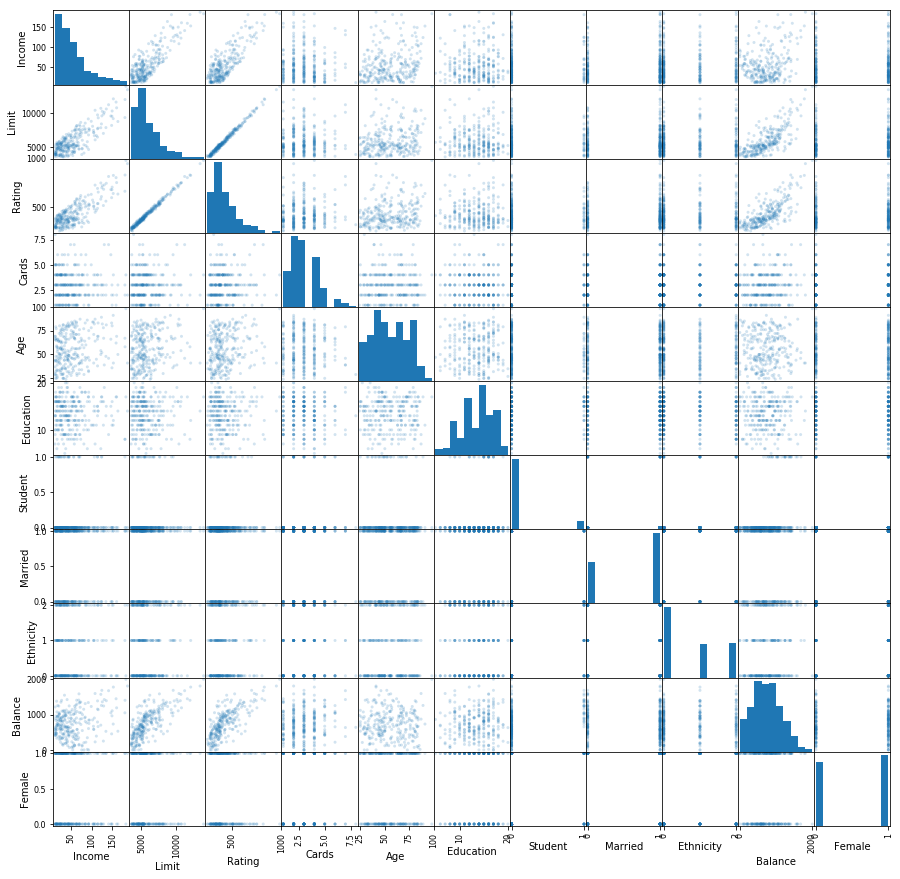

In [107]:
scatter_matrix(df, alpha=0.2,figsize=(15,15))
None

In [108]:
y = df.Balance # y is lowercase because it's a one dimensional vector
X = df[['Limit','Income','Rating','Student']] #X is capitalized because it is a matrix (multi-dimensional)
X = sm.add_constant(X)
#X['Rating'] = df.Rating
#X['Income'] = df.Income

In [109]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 1 to 400
Data columns (total 5 columns):
const      267 non-null float64
Limit      267 non-null int64
Income     267 non-null float64
Rating     267 non-null int64
Student    267 non-null int64
dtypes: float64(2), int64(3)
memory usage: 12.5 KB


In [110]:
model = sm.OLS(y,X).fit()

In [111]:
model.params

const     -721.436891
Limit        0.225838
Income     -10.016818
Rating       1.465357
Student    498.941211
dtype: float64

In [112]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     6599.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.35e-261
Time:                        14:16:57   Log-Likelihood:                -1358.1
No. Observations:                 267   AIC:                             2726.
Df Residuals:                     262   BIC:                             2744.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -721.4369     11.733    -61.486      0.000    -744.541    -698.333
Limit          0.2258      0.014     16.670      0.000       0.199       0.253
Income       -10.0168      0.110    -91.014      0.000     -10.234      -9.800
Rating         1.4654      0.199      7.370      0.000       1.074       1.857
Student      498.9412      7.932     62.905      0.000     483.323     514.559
==============================================================================
Omnibus:                       20.831   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.973
Skew:                           0.572   Prob(JB):                     1.39e-06
Kurtosis:                       4.056   Cond. No.                     3.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,267.0,55.101206,38.861098,10.403,26.281,44.158,70.502,186.634
Limit,267.0,5901.520599,1898.453825,3526.000,4622.500,5352.000,6801.500,13913.000
Rating,267.0,432.580524,128.263284,256.000,344.000,394.000,491.000,982.000
Cards,267.0,2.951311,1.395976,1.000,2.000,3.000,4.000,8.000
Age,267.0,55.625468,17.567758,24.000,42.000,55.000,69.000,98.000
Education,267.0,13.355805,3.220703,5.000,11.000,14.000,16.000,20.000
Student,267.0,0.104869,0.306960,0.000,0.000,0.000,0.000,1.000
Married,267.0,0.632959,0.482903,0.000,0.000,1.000,1.000,1.000
Ethnicity,267.0,0.745318,0.833242,0.000,0.000,0.000,1.500,2.000
Balance,267.0,745.617978,395.722310,0.000,455.000,717.000,1010.500,1999.000


In [65]:
df[df.Balance < 10].describe().T # Dataframe filtering

,count,mean,std,min,25%,50%,75%,max
Income,4.0,75.49425,16.169984,53.598,69.954,78.1335,83.67375,92.112
Limit,4.0,4072.50000,391.276117,3714.000,3834.000,3982.0000,4220.50000,4612.000
Rating,4.0,315.75000,28.099526,286.000,295.000,316.5000,337.25000,344.000
Cards,4.0,3.00000,0.000000,3.000,3.000,3.0000,3.00000,3.000
Age,4.0,43.75000,20.155644,29.000,31.250,36.5000,49.00000,73.000
Education,4.0,15.75000,1.500000,14.000,14.750,16.0000,17.00000,17.000
Balance,4.0,0.00000,0.000000,0.000,0.000,0.0000,0.00000,0.000
Gender_ Male,4.0,0.25000,0.500000,0.000,0.000,0.0000,0.25000,1.000
Gender_Female,4.0,0.75000,0.500000,0.000,0.750,1.0000,1.00000,1.000
Student_No,4.0,1.00000,0.000000,1.000,1.000,1.0000,1.00000,1.000
